<a href="https://colab.research.google.com/github/Aishwarya-ps-kumbla/MST_Aish_practice_problems_01/blob/main/aish_casestudy_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#downloading dataset from Kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:28<00:00, 73.9MB/s]
100% 1.98G/1.98G [00:28<00:00, 74.0MB/s]


In [7]:
#extracting the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#loading train dataset with batches of 10 from the subdirectories
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=10,
    image_size=(256,256)
)

Found 3115 files belonging to 36 classes.


In [10]:
#loading test dataset with batches of 10 from the subdirectories
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=5,
    image_size=(256,256)
)

Found 359 files belonging to 36 classes.


In [11]:
model = Sequential() # Create an instance of the Sequential class

#convolution
#convolution of 256*256images with 16 3*3 filters,no padding
model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution with 32 3*3 filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution with 64 3*3 filters
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convolution with 128 3*3 filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#flattening the image to 1D
model.add(Flatten())

#Dense layers of ANN
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
#output layer
model.add(Dense(1,activation='softmax'))

In [12]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [13]:
#compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#records training metrics for each epoch. This includes the loss and the accuracy
history=model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
312/312 [==============================] - 70s 217ms/step - loss: -24956756.0000 - accuracy: 0.0241 - val_loss: -44827632.0000 - val_accuracy: 0.0251
Epoch 2/5
312/312 [==============================] - 69s 217ms/step - loss: -79798272.0000 - accuracy: 0.0241 - val_loss: -109747768.0000 - val_accuracy: 0.0251
Epoch 3/5
312/312 [==============================] - 72s 224ms/step - loss: -182301504.0000 - accuracy: 0.0241 - val_loss: -242189632.0000 - val_accuracy: 0.0251
Epoch 4/5
312/312 [==============================] - 70s 218ms/step - loss: -346650368.0000 - accuracy: 0.0241 - val_loss: -533122816.0000 - val_accuracy: 0.0251
Epoch 5/5
312/312 [==============================] - 70s 220ms/step - loss: -588389376.0000 - accuracy: 0.0241 - val_loss: -746322688.0000 - val_accuracy: 0.0251


for the above,accuracy is less due to less number of images in training dataset,underfitting

In [15]:
#importing libraries for computer vision
import cv2
import matplotlib.pyplot as plt

In [26]:
#reading image
test_img=cv2.imread('/mango.jpg')

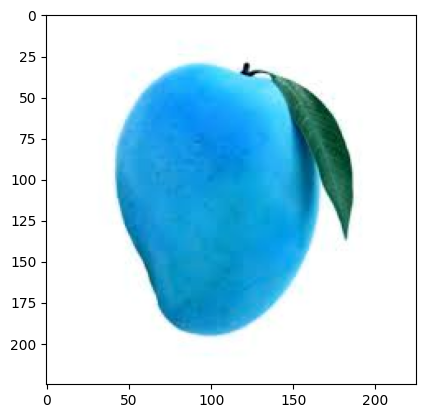

In [27]:
#viewing the image
plt.imshow(test_img)

In [28]:
#checking the shape of the image
test_img.shape

(225, 225, 3)

In [29]:
#resizing the image to match with trainingset
test_img=cv2.resize(test_img,(256,256))

In [30]:

#reshaping the image to pass into the CNN model
test_input=test_img.reshape((1,256,256,3))

In [31]:
#predicting the image as fruit or vegetable
model.predict(test_input)

1/1 [==============================] - 0s 387ms/step


array([[1.]], dtype=float32)

the images are classified as 1 for fruits and 0 for vegetables

In [32]:
#importing library for feature extraction

from keras.applications.vgg16 import VGG16

In [33]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))

In [34]:
#viewing the model summary
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [36]:
#passing the images to top layer
from keras.models import Sequential
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
#freezing the training on top layer
model.trainable=False

In [38]:
#viewing the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23103809 (88.13 MB)
_________________________________________________________________


In [39]:
#normalizing
def normalize(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

In [40]:
train_ds=train_ds.map(normalize)
validation_ds=validation_ds.map(normalize)

In [41]:
#compiling
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history=model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
312/312 [==============================] - 77s 229ms/step - loss: 8.0414 - accuracy: 0.0193 - val_loss: 7.9504 - val_accuracy: 0.0223
Epoch 2/5
312/312 [==============================] - 79s 247ms/step - loss: 8.0414 - accuracy: 0.0193 - val_loss: 7.9504 - val_accuracy: 0.0223
Epoch 3/5
312/312 [==============================] - 74s 231ms/step - loss: 8.0414 - accuracy: 0.0193 - val_loss: 7.9504 - val_accuracy: 0.0223
Epoch 4/5
312/312 [==============================] - 72s 222ms/step - loss: 8.0414 - accuracy: 0.0193 - val_loss: 7.9504 - val_accuracy: 0.0223
Epoch 5/5
312/312 [==============================] - 74s 232ms/step - loss: 8.0414 - accuracy: 0.0193 - val_loss: 7.9504 - val_accuracy: 0.0223


In [18]:
#checking the layernames
for layer in conv_base.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [43]:
#checking for top layer to train
conv_base.trainable=True
set_trainable=False
if layer.name=='block5_conv1':
  set_trainable=True
if set_trainable==True:
  layer.trainable=True
else:
  layer.trainable=False

In [44]:
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [45]:
#viewing the model summary
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [47]:
#training top layer with fine tuning
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 23103809 (88.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history=model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
312/312 [==============================] - 103s 293ms/step - loss: -2047672611336408453349376.0000 - accuracy: 0.0241 - val_loss: -3857638749156738714304512.0000 - val_accuracy: 0.0251
Epoch 2/5
312/312 [==============================] - 87s 272ms/step - loss: -5620079012598977453359104.0000 - accuracy: 0.0241 - val_loss: -7423404466667960351588352.0000 - val_accuracy: 0.0251
Epoch 3/5
312/312 [==============================] - 86s 269ms/step - loss: -9185659974439085843415040.0000 - accuracy: 0.0241 - val_loss: -10992830998186684879732736.0000 - val_accuracy: 0.0251
Epoch 4/5
312/312 [==============================] - 87s 272ms/step - loss: -12745478058138416908861440.0000 - accuracy: 0.0241 - val_loss: -14548947050934723359539200.0000 - val_accuracy: 0.0251
Epoch 5/5
312/312 [==============================] - 86s 269ms/step - loss: -16298070782768376864309248.0000 - accuracy: 0.0241 - val_loss: -18089703883398389423931392.0000 - val_accuracy: 0.0251
